# Boosting

Les méthodes d'ensemble sont des algorithmes d'apprentissage fondés sur l'idée qu'une combinaison de classifieurs simples (dits faibles), si elle est bien faite, doit donner de meilleurs résultats que chacun des classifieurs pris séparément. Le principe général suivant est adopté : il s'agit de construire une famille de modèles qui sont ensuite agrégés (moyenne pondérée des estimations,vote,...). Suivant la famille de modèles considérés (modèles dépendant les uns des autres, modèles indépendants), on aboutit à des stratégies différentes (boosting dans le premier cas, bagging, forêts aléatoires dans le second cas)


Dans ces méthodes, les notions de classifieurs faible est fort est fondamentale. 
Considérons un problème de classification binaire, à valeurs dans $\{-1,1\}$. Soit un ensemble d'exemples  

$$Z=\left \{(\mathbf x_i,y_i),1\leq i\leq n, \mathbf x_i\in X,y_i\in \{-1,1\} \right \}$$

les $\mathbf x_i$ étant des échantillons d'une certaine distribution $P$,  et $y_i=f(\mathbf x_i)$, $f$ règle de classification. Un classifieur $h$ est dit fort si, pour $n$ suffisamment grand, il produit pour tout $P$, $f$, $\epsilon\geq 0$ et $\delta\leq 1/2$ une sortie avec probabilité plus petite que $1-\delta$ telle que $\mathbb{P}_p(h(\mathbf x)\neq f(\mathbf x))\leq \epsilon$. De plus, la complexité temporelle de $h$ doit au plus être polynomiale en $1/\epsilon$, $1/\delta$ et $n$.\\
A l'inverse, un classifieur faible produit, pour un certain $\epsilon_0\geq 0$, un certain $\delta_0\leq 1/2$, une sortie avec probabilité plus petite que $1-\delta_0$  telle que $\mathbb{P}_p(h(\mathbf x)\neq f(\mathbf x))\leq \epsilon_0$. En pratique, souvent, les classifieurs faibles produisent des résultats à peine meilleurs que l'aléatoire (dans le cas de la classification binaire, un tirage uniforme sur  $\{-1,1\}$).


Le boosting considère la construction d'une famille de modèles dépendant les uns des autres. Chaque modèle est une version adaptative du précédent en donnant plus de poids, lors de l'estimation suivante, aux observations mal ajustées ou mal prédites. Intuitivement, ces algorithmes concentrent donc leurs efforts sur les observations les plus difficiles à ajuster tandis que l'agrégation de l'ensemble des modèles permet d'échapper au surajustement.


 Les algorithmes de boosting  diffèrent par plusieurs caractéristiques :
- la façon de pondérer c'est-à-dire de renforcer l'importance des observations mal estimées lors de l'itération précédente ;
- leur objectif selon le type de la variable à prédire  : binaire, qualitative à $C$ classes, réelles ;
- la fonction perte, qui peut être choisie plus ou moins robuste aux valeurs atypiques, pour mesurer l'erreur d'ajustement ;
- la façon de pondérer les classifieurs successifs.




Le premier algorithme de boosting a été en 1990, dans lequel un classifieur fort est construit par combinaison de classifieurs faibles.


```{prf:algorithm} 
:label: stacking-algorithm
**Entrée** : l'ensemble d'apprentissage $Z$

**Sortie** : Un classifieur $h$

1. Z_1$ : sous-ensemble de $n_1<n$ exemples de $Z$, tirés aléatoirement sans remise
2. apprentissage d'un classifieur faible $h_1$ sur $Z_1$
4. apprentissage d'un classifieur faible $h_2$ sur $Z_2$
5. $Z_3$ : ensemble des exemples sur lesquels $h_1$ et $h_2$ sont en désaccord
6.  apprentissage d'un classifieur faible $h_3$ sur $Z_3$

$h(\mathbf x) = sign\left (\displaystyle\sum_{i=1}^3 h_i(\mathbf x) \right)$

```


# AdaBoost
AdaBoost (Adaptive Boosting) propose d'utiliser des versions pondérées du même ensemble d'apprentissage, plutôt que des sous-ensembles produits aléatoirement. 


## Algorithme
Soit un problème de classification à deux classes. On dispose d'un ensemble d'apprentissage  $Z$ et on cherche à évaluer la classe d'un point $\mathbf x\in X$.  On dispose de $M$ classifieurs faibles $h_i$ donnant une classification faible de $\mathbf x$. On souhaite construire un classifieur $h$, à valeurs dans $\{-1, 1\}$, combinaison linéaire des $h_i$.

Dans cet algorithme, le modèle de base retourne l'identité d'une classe, il est encore nommé AdaBoost discret ({prf:ref}`adaboost-algorithm`). Il est facile de l'adapter à des modèles retournant une valeur réelle comme une probabilité d'appartenance à une classe.


```{prf:algorithm} 
:label: adaboost-algorithm

**Entrée** : l'ensemble d'apprentissage $Z$, \mathbf x$, $M$

**Sortie** : Un classifieur $h$

Initialisation des poids $\mathbf w$ : $\forall i\in\{1\cdots n\},(w_i=\frac{1}{n})$

Pour $i=1$ à $M$
  1. Estimer $h_i$ sur $Z$ pondéré par $w$
  2. Calculer le taux d'erreur 
  3. \epsilon_i = \displaystyle\sum_{j=1}^n\mathbf{1}_{h_i(\mathbf x_j)\neq y_j} $
  4. Calculer le poids du classifieur faible $\alpha_i\leftarrow \frac{1}{2}log\left ( \frac{1-\epsilon_i}{\epsilon_i}\right)$
  5. Pour $j=1$ à $n$ : $w_j\leftarrow w_j exp\left[ -\alpha_iy_jh_i(\mathbf x_j)\right]$
  6. Renormaliser les poids : $W= \displaystyle\sum_{j=1}^n w_j$\\
  7. Pour $j=1$ à $n$ : $w_j\leftarrow w_j/W$ 

$h(\mathbf x)=sign\left [\displaystyle\sum_{j=1}^M\alpha_jh_j(\mathbf x) \right]$
```

Les poids de chaque observation sont initialisés à ${1}{/n}$ pour l'estimation du premier modèle, puis évoluent à chaque itération donc pour chaque nouvelle estimation. Le poids d'un exemple est inchangé si ce dernier est bien classé, il croît sinon proportionnellement au défaut d'ajustement du modèle. Estimer $h_i$ sur $Z$ pondéré par $\mathbf w$ signifie trouver le classifieur faible parmi une famille de classifieurs satisfaisant 

$$\displaystyle\sum_{j=1}^n w_j\mathbf{1}_{h_i(\mathbf x_j)\neq y_j}\leq \frac{1}{2}-\epsilon$$

pour un petit $\epsilon$. 

L'agrégation finale des prévisions : 

$$\displaystyle\sum_{i=1}^M\alpha_ih_i(\mathbf x)$$

est une combinaison pondérée par les qualités d'ajustement de chaque modèle. Sa valeur absolue appelée marge est proportionnelle à la confiance que l'on peut attribuer à son signe qui fournit le résultat de la prévision.

Après $M$ itérations, les exemples avec un très fort poids sont des exemples durs à apprendre, et possiblement des points aberrants. AdaBoost peut donc servir à détecter des outliers sur un ensemble d'apprentissage $Z$ donné.

Notons qu'il est possible d'étendre AdaBoost à des problèmes de régression.

/Users/vibarra/Venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


/Users/vibarra/Venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


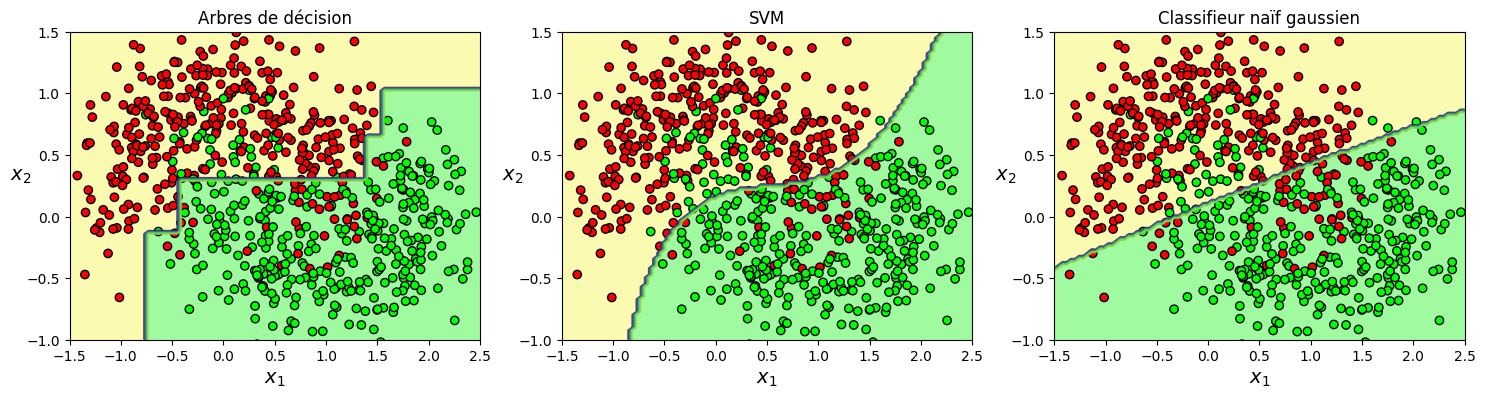

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons



def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    mapp = ListedColormap(['#FF0000', '#00FF00'])
    map = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=1, cmap=map)
    if contour:
        plt.contour(x1, x2, y_pred, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=mapp,edgecolors='k')
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)

X, y = make_moons(n_samples=700, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

nb_weak = 10

# Adaboost sur arbres de décision
adaDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                               n_estimators=nb_weak,algorithm="SAMME.R", 
                               learning_rate=0.5, random_state=42)
# Adaboost sur SVM
adaSVC_clf = AdaBoostClassifier(SVC(kernel="rbf", C=50, random_state=42,gamma='auto'), 
                                n_estimators=nb_weak,algorithm="SAMME", 
                                learning_rate=1, random_state=42)
# Classifieur de Bayes naif gaussien
adaGAU_clf = AdaBoostClassifier(GaussianNB(), n_estimators=nb_weak,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

plt.figure(figsize=(18, 4))
for clf,i,title in ((adaDT_clf,1,'Arbres de décision'), 
                    (adaSVC_clf,2,'SVM'), 
                    (adaGAU_clf,3,'Classifieur naïf gaussien')):
    clf.fit(X_train, y_train)
    plt.subplot(1,3,i)
    plt.title(title)
    plot_decision_boundary(clf, X, y)

## Interprétation statistique
Il est possible d'interpréter Adaboost en termes statistiques, pour justifier en partie le bon comportement du boosting en classification. Pour ce faire, on définit les classifieurs faibles comme des fonctions paramétriques $h_{\theta_i}(\mathbf x) = h_i(\mathbf x,\theta)$, $\theta\in\Theta$, et le résultat de la classification comme une combinaison linéaire de ces classifieurs faibles $h(\mathbf x)=\displaystyle\sum_{i=1}^n \alpha_i h_{\theta_i}(\mathbf x)$.

Une approche pour déterminer les $\theta_i$ et les $\alpha_i$ est d'ajouter séquentiellement au problème d'apprentissage les classifieurs faibles, sans ajuster les paramètres et les coefficients de la solution courante ({prf:ref}`adaboost-stat-algorithm`).



```{prf:algorithm} 
:label: adaboost-stat-algorithm

**Entrée** : l'ensemble d'apprentissage $Z$, \mathbf x$, $M$

**Sortie** : Un classifieur $h$

Initialisation des poids $\mathbf w$ : $\forall i\in\{1\cdots n\},(w_i=\frac{1}{n})$

Pour $i=1$ à $M$
  1. $h_0(\mathbf x) = 0$

Pour $i=1$ à $M$

    1. $(\alpha_i,\theta_i) = arg\displaystyle\min_{\alpha\in\mathbb{R}^+,\theta\in\Theta} \displaystyle\sum_{j=1}^n L(y_jh_{i-1}(\mathbf x_j)+\alpha h_{\theta_i}(\mathbf x_j))$
    2. $h_i(\mathbf x) = h_{i-1}(\mathbf x)+\alpha_i h_{\theta_i}(\mathbf x)$

$h(\mathbf x)=\displaystyle\sum_{i=1}^n \alpha_i h_{\theta_i}(\mathbf x)$
```




Cet algorithme, lorsque l'on utilise la fonction de perte exponentielle $L(y,f(\mathbf x)) = e^{-yf(\mathbf x)}$, est équivalent à l'algorithme Adaboost. En effet, à chaque itération, la minimisation suivante est effectuée : 

$$ 
(\alpha_i,\theta_i) &=& arg\min_{\alpha\in\mathbb{R}^+,\theta\in\Theta} \displaystyle\sum_{j=1}^nexp\left [-y_j(h_{i-1}(\mathbf x_j)+\alpha h_{\theta_i}(\mathbf x_j)) \right ]\\
&=& arg\min_{\alpha\in\mathbb{R}^+,\theta\in\Theta} \displaystyle\sum_{j=1}^nexp\left [-y_jh_{i-1}(\mathbf x_j)\right ]exp\left [-y_j\alpha h_{\theta_i}(\mathbf x_j) \right ]\\
&=& arg\min_{\alpha\in\mathbb{R}^+,\theta\in\Theta} \displaystyle\sum_{j=1}^n w_j^i exp\left[-y_j\alpha h_{\theta_i}(\mathbf x_j) \right]
\label{eqWeakMin}
$$ 

où $w_j^i = exp\left [-y_j h_{i-1}(\mathbf x_j) \right]$ n'affecte pas le problème d'optimisation. Pour tout $\alpha>0$, la fonction objectif peut être réécrite 

$$
\theta_i &=& arg\min_{\theta\in\Theta} \left [e^{-\alpha}\displaystyle\sum_{y_j=h_{\theta_i}(\mathbf x_j)} w_j^t +e^\alpha \displaystyle\sum_{y_j\neq h_{\theta_i}(\mathbf x_j)} w_j^i \right ]\\
&=& arg\min_{\theta\in\Theta} \left [(e^{-\alpha}+e^\alpha)\displaystyle\sum_{j=1}^nw_j^i \mathbb{I}_{\{y_j\neq h_{\theta_i}(\mathbf x_j)\}} +e^\alpha \displaystyle\sum_{j=1}^n w_j^i \right ]\\
&=&arg\min_{\theta\in\Theta} \displaystyle\sum_{j=1}^nw_j^i \mathbb{I}_{\{y_j\neq h_{\theta_i}(\mathbf x_j)\}} \\
$$

Le classifieur faible minimisant (\ref{eqWeakMin}) minimisera donc également le taux d'erreur pondéré, que l'on réinjecte dans (\ref{eqWeakMin}) pour trouver

$$\alpha_i=\frac{1}{2}log\frac{1-\epsilon_i}{\epsilon_i}$$

avec

$$\epsilon_i= \displaystyle\sum_{j=1}^nw_j^i \mathbb{I}_{\{y_j\neq h_{\theta_i}(\mathbf x_j)\}}$$

Enfin, la mise à jour du modèle $h_i(\mathbf x) = h_{i-1}(\mathbf x)+\alpha_ih_{\theta_i}(\mathbf x)$ est équivalente à la mise à jour des poids dans AdaBoost, puisque 

$$w_j^{i+1}=w_j^{i}e^{-y_jh_i(\mathbf x_j)}$$

En résumé, AdaBoost peut être interprété comme un algorithme minimisant la fonction de perte exponentielle par ajout itératif de classifieurs faibles. 

## Interprétation comme problème de maximisation d'une marge
Il est également possible de relier AdaBoost à un problème de séparation à vaste marge.

Le principe est de construire un espace de coordonnées de dimension égale au nombre de classifieurs faibles, $M$, et pour $\mathbf u\in \mathbb{R}^M$ de considérer les coordonnées $u_i$ comme les sorties des classifieurs faibles $h_i$. On montre alors qu'AdaBoost est un algorithme itératif qui résout le problème d'optimisation suivant

$$\hat{w} = arg \max_{\mathbf w\in\mathbb{R}^M}\min_{\mathbf{u_j}\in\mathbb{R}^M}\frac{y_j\mathbf w^T\mathbf{u_j}}{\|\mathbf w\|_{L_1}}$$

où $\mathbf{u_j}=(h_1(\mathbf x_j)\cdots h_M(\mathbf x_j))$ et où le classifieur final est 

$$h(\mathbf x) = \displaystyle\sum_{i=1}^M\hat{w}_ih_i(\mathbf x)$$

ce qui correspond à un problème de maximisation de la plus petite des distance entre des points de classes différentes, soit un problème de maximisation de marge.